In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Importing Data

In [ ]:
data = pd.read_csv('a.csv', date_parser = True)

**Droping The observations with Null Value that will be the day when market is closed**

In [ ]:

data.dropna( axis=0, how="any", thresh=None, subset=None, inplace=True)

**Using the data before 2015 as Training Data and after 2015 as Test Data**

In [ ]:
data  _training = data[data['Date']<'2015-01-01'].copy()
data_test = data[data['Date']>='2015-01-01'].copy()

In [ ]:
data_training_df = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [ ]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training_df)

In [ ]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(2783, 60, 5)

#  LSTM using Tensorflow

## Importing Packages

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [ ]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
87/87 [==============================] - 21s 202ms/step - loss: 0.0473
Epoch 2/50
87/87 [==============================] - 17s 199ms/step - loss: 0.0022
Epoch 3/50
87/87 [==============================] - 17s 197ms/step - loss: 0.0023
Epoch 4/50
87/87 [==============================] - 16s 189ms/step - loss: 0.0020
Epoch 5/50
87/87 [==============================] - 17s 195ms/step - loss: 0.0022
Epoch 6/50
87/87 [==============================] - 17s 190ms/step - loss: 0.0018
Epoch 7/50
87/87 [==============================] - 17s 198ms/step - loss: 0.0020
Epoch 8/50
87/87 [==============================] - 17s 191ms/step - loss: 0.0016
Epoch 9/50
87/87 [==============================] - 17s 191ms/step - loss: 0.0018
Epoch 10/50
87/87 [==============================] - 17s 192ms/step - loss: 0.0013
Epoch 11/50
87/87 [==============================] - 17s 193ms/step - loss: 0.0014
Epoch 12/50
87/87 [==============================] - 17s 198ms/step - loss: 0.0014
Epoch 13/50
8

In [ ]:
past_60_days = data_training_df.tail(60)

In [ ]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)

In [ ]:
inputs = scaler.transform(df)

In [ ]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((1483, 60, 5), (1483,))

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
scaler.scale_

array([2.05133922e-05, 2.04781518e-05, 2.07305962e-05, 2.06370271e-05,
       3.14324062e-08])

In [ ]:
scale = 1/2.05133922e-05

In [ ]:
y_pred = y_pred*scale
y_test = y_test*scale

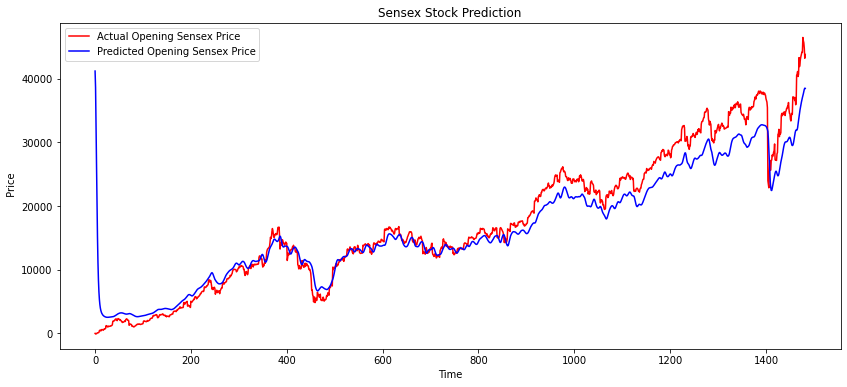

In [ ]:
# Visualising the results
plt.figure(figsize=(14,6))
plt.plot(y_test, color = 'red', label = 'Actual Opening Sensex Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Opening Sensex Price')
plt.title('Sensex Stock Prediction')
plt.xlabel('Time')
plt.ylabel(' Price')
plt.legend()
plt.show()

# Tweaking with Pytorch

There are two ways to explore the model either we will go with keras or Pytorch and aI am going to use Pytorch Here Because in Pytorch we will be able to define our own LSTM models , activation functions and Optimization ALgorithm whereas Keras Have not the level of flexibility that Pytorch Will Give

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0373fbce-8b1e-4b80-986c-32bb230c4719' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>